In [1]:
import numpy as np
import pandas as pd

# Intro to data structures

## Series

``Series`` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. The basic method to create a ``Series`` is to call:

In [ ]:
s = pd.Series(data, index=index)

Here, data can be many different things:

- a Python dict
- an ndarray
- a scalar value (like 5)

The passed index is a list of axis labels. Thus, this separates into a few cases depending on what data is:

**From ndarray**

If data is an ``ndarray``, index must be the same length as data. If no index is passed, one will be created having values ``[0, ..., len(data) - 1]``.

In [3]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

s

a    1.500772
b    0.883869
c    0.977068
d   -0.372814
e   -0.592359
dtype: float64

In [4]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [5]:
pd.Series(np.random.randn(5))

0   -0.809687
1   -0.462177
2    0.236942
3    0.890105
4    0.801612
dtype: float64

> pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time.

**From dict**

``Series`` can be instantiated from dicts:

In [6]:
d = {"b": 1, "a": 0, "c": 2}

pd.Series(d)

b    1
a    0
c    2
dtype: int64

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [7]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}

pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [8]:

pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

``NaN`` (not a number) is the standard missing data marker used in pandas.

**From scalar value**

If ``data`` is a scalar value, an index must be provided. The value will be repeated to match the length of index.

In [9]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

### Series is ndarray-like

``Series`` acts very similarly to an ``ndarray`` and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [10]:
s[0]

1.5007718759337565

In [11]:
s[:3]

a    1.500772
b    0.883869
c    0.977068
dtype: float64

In [12]:
s[s > s.median()]

a    1.500772
c    0.977068
dtype: float64

In [13]:
s[[4, 3, 1]]

e   -0.592359
d   -0.372814
b    0.883869
dtype: float64

In [14]:
np.exp(s)

a    4.485150
b    2.420245
c    2.656656
d    0.688793
e    0.553021
dtype: float64

> We will address array-based indexing like ``s[[4, 3, 1]]`` in section on indexing.

Like a NumPy array, a pandas ``Series`` has a single ``dtype``.

In [15]:
s.dtype

dtype('float64')

This is often a NumPy ``dtype``. However, pandas and 3rd-party libraries extend NumPy’s type system in a few places, in which case the ``dtype`` would be an ``ExtensionDtype``. Some examples within pandas are Categorical data and Nullable integer data type. See [dtypes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes) for more.

If you need the actual array backing a ``Series``, use ``Series.array``.

In [16]:
s.array

<PandasArray>
[ 1.5007718759337565,  0.8838688367427262,   0.977068150470213,
 -0.3728139222683686, -0.5923585470943448]
Length: 5, dtype: float64

Accessing the array can be useful when you need to do some operation without the index (to disable automatic alignment, for example).

``Series.array`` will always be an ``ExtensionArray``. Briefly, an ``ExtensionArray`` is a thin wrapper around one or more concrete arrays like a ``numpy.ndarray``. pandas knows how to take an ``ExtensionArray`` and store it in a ``Series`` or a column of a ``DataFrame``. See dtypes for more.

While Series is ``ndarray``-like, if you need an actual ``ndarray``, then use ``Series.to_numpy()``.

In [18]:
s.to_numpy()

array([ 1.50077188,  0.88386884,  0.97706815, -0.37281392, -0.59235855])

Even if the ``Series`` is backed by an ``ExtensionArray``, ``Series.to_numpy()`` will return a NumPy ``ndarray``.

### Series is dict-like

A ``Series`` is also like a fixed-size dict in that you can get and set values by index label:

In [21]:
s["a"]

1.5007718759337565

In [22]:
s["e"] = 12.0

s

a     1.500772
b     0.883869
c     0.977068
d    -0.372814
e    12.000000
dtype: float64

In [23]:
"e" in s

True

In [24]:
"f" in s

False

If a label is not contained in the index, an exception is raised:

In [25]:
s["f"]

KeyError: 'f'

Using the ``Series.get()`` method, a missing label will return None or specified default:

In [26]:
s.get("f")

In [27]:
s.get("f", np.nan)

nan

### Vectorized operations and label alignment with Series

When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with ``Series`` in pandas. ``Series`` can also be passed into most NumPy methods expecting an ``ndarray``.

In [29]:
s + s

a     3.001544
b     1.767738
c     1.954136
d    -0.745628
e    24.000000
dtype: float64

In [30]:
s * 2

a     3.001544
b     1.767738
c     1.954136
d    -0.745628
e    24.000000
dtype: float64

In [31]:
np.exp(s)

a         4.485150
b         2.420245
c         2.656656
d         0.688793
e    162754.791419
dtype: float64

A key difference between ``Series`` and ``ndarray`` is that operations between ``Series`` automatically align the data based on label. Thus, you can write computations without giving consideration to whether the ``Series`` involved have the same labels.

In [32]:
s[1:] + s[:-1]

a         NaN
b    1.767738
c    1.954136
d   -0.745628
e         NaN
dtype: float64

The result of an operation between unaligned ``Series`` will have the **union** of the indexes involved. If a label is not found in one ``Series`` or the other, the result will be marked as missing ``NaN``. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data.

> In general, we chose to make the default result of operations between differently indexed objects yield the union of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the dropna function.

### Name attribute

``Series`` also has a ``name`` attribute:

In [33]:
s = pd.Series(np.random.randn(5), name="something")

s

0    0.079449
1   -0.384365
2    0.810506
3   -0.652392
4   -0.712942
Name: something, dtype: float64

In [34]:
s.name

'something'

The ``Series`` ``name`` can be assigned automatically in many cases, in particular, when selecting a single column from a DataFrame, the ``name`` will be assigned the column label.

You can rename a ``Series`` with the ``pandas.Series.rename()`` method.

In [38]:
s2 = s.rename("different")

s2.name

'different'

Note that ``s`` and ``s2`` refer to different objects.

In [40]:
id(s) != id(s2)

True

## DataFrame

``DataFrame`` is a **2-dimensional labeled data structure** with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of ``Series`` objects. It is generally the most commonly used pandas object. Like ``Series``, ``DataFrame`` accepts many different kinds of input:

- Dict of 1D ``ndarrays``, lists, dicts, or S``e``ries
- 2-D ``numpy.ndarray``
- Structured or record ``ndarray``
- A Series
- Another ``DataFrame``


Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting ``DataFrame``. Thus, a dict of ``Series`` plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

### From dict of Series or dicts

The resulting index will be the **union** of the indexes of the various ``Series``. If there are any nested dicts, these will first be converted to ``Series``. If no columns are passed, the columns will be the ordered list of dict keys.

In [42]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(d)

df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [44]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [45]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


The row and column labels can be accessed respectively by accessing the ``index`` and ``columns`` attributes:

In [46]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [47]:
df.columns

Index(['one', 'two'], dtype='object')

### From dict of ndarrays / lists

The ``ndarrays`` must all be the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be ``range(n)``, where n is the array length.

In [48]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [49]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


### From a list of dicts

In [53]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [54]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [55]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


### From a Series

The result will be a ``DataFrame`` with the same index as the input ``Series``, and with one column whose name is the original name of the ``Series`` (only if no other column name provided).

In [56]:
ser = pd.Series(range(3), index=list("abc"), name="ser")

pd.DataFrame(ser)

,ser
a,0
b,1
c,2


### From a list of dataclasses

Data Classes as introduced in [PEP557](https://www.python.org/dev/peps/pep-0557), can be passed into the ``DataFrame`` constructor. Passing a list of dataclasses is equivalent to passing a list of dictionaries.

Please be aware, that all values in the list should be dataclasses, mixing types in the list would result in a ``TypeError``.

In [57]:
from dataclasses import make_dataclass

Point = make_dataclass("Point", [("x", int), ("y", int)])

pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


**Missing data**

To construct a ``DataFrame`` with missing data, we use ``np.nan`` to represent missing values. Alternatively, you may pass a ``numpy.MaskedArray`` as the data argument to the ``DataFrame`` constructor, and its masked entries will be considered missing. See Missing data for more.

### Alternate constructors

**``DataFrame.from_dict``**

``DataFrame.from_dict()`` takes a dict of dicts or a dict of array-like sequences and returns a ``DataFrame``. It operates like the ``DataFrame`` constructor except for the orient parameter which is 'columns' by default, but which can be set to 'index' in order to use the dict keys as row labels.

In [58]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


If you pass ``orient='index'``, the keys will be the row labels. In this case, you can also pass the desired column names:

In [60]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)


,one,two,three
A,1,2,3
B,4,5,6


### Column selection, addition, deletion

You can treat a ``DataFrame`` semantically like a **dict of like-indexed ``Series``** objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [61]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [63]:
df["three"] = df["one"] * df["two"]

df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [64]:
df["flag"] = df["one"] > 2

df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict:

In [65]:
del df["two"]

df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [66]:
three = df.pop("three")

In [67]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated to fill the column:

In [68]:
df["foo"] = "bar"

df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a ``Series`` that does not have the same index as the ``DataFrame``, it will be conformed to the ``DataFrame’s`` index:

In [69]:
df["one_trunc"] = df["one"][:2]

df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ``ndarrays`` but their length must match the length of the ``DataFrame``'s index.

By default, columns get inserted at the end. ``DataFrame.insert()`` inserts at a particular location in the columns:

In [70]:
df.insert(1, "bar", df["one"])

df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


### Assigning new columns in method chains

Inspired by ``dplyr``’s ``mutate`` verb, ``DataFrame`` has an ``assign()`` method that allows you to easily create new columns that are potentially derived from existing columns.

In [72]:
iris = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/iris.data")

iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the ``DataFrame`` being assigned to.

In [75]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


``assign()`` always returns a copy of the data, leaving the original ``DataFrame`` untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the ``DataFrame`` at hand. This is common when using ``assign()`` in a chain of operations. For example, we can limit the ``DataFrame`` to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

<AxesSubplot:xlabel='SepalRatio', ylabel='PetalRatio'>

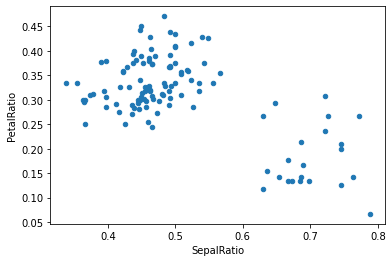

In [82]:
(
    iris.query("SepalLength > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)


Since a function is passed in, the function is computed on the ``DataFrame`` being assigned to. Importantly, this is the ``DataFrame`` that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered ``DataFrame`` available.

The function signature for ``assign()`` is simply ``**kwargs``. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a ``Series`` or NumPy array), or a function of one argument to be called on the ``DataFrame``. A copy of the original ``DataFrame`` is returned, with the new values inserted.

The order of ``**kwargs`` is preserved. This allows for dependent assignment, where an expression later in ``**kwargs`` can refer to a column created earlier in the same ``assign()``.

In [83]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In the second expression, ``x['C']`` will refer to the newly created column, that’s equal to ``dfa['A'] + dfa['B']``.

### Indexing / selection

The basics of indexing are as follows:

| Operation | Syntax | Result | 
|---|---|---|
Select column | ``df[col]`` | Series
Select row by label | ``df.loc[label]`` | Series
Select row by integer location | ``df.iloc[loc]`` | Series
Slice rows | ``df[5:10]`` | DataFrame
Select rows by boolean vector | ``df[bool_vec]`` | DataFrame

Row selection, for example, returns a ``Series`` whose index is the columns of the ``DataFrame``:

In [84]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [85]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

For a more exhaustive treatment of sophisticated label-based indexing and slicing, see the section on [indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing). We will address the fundamentals of reindexing / conforming to new sets of labels in the section on [reindexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-reindexing).

### Data alignment and arithmetic

Data alignment between ``DataFrame`` objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [86]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])

df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

df + df2

,A,B,C,D
0,-0.583946,-0.501368,0.922692,NaN
1,3.294909,0.260187,-1.911011,NaN
2,-1.443973,-0.784156,1.493820,NaN
3,-3.015013,0.920236,-0.306262,NaN
4,-0.116459,2.052471,2.176372,NaN
5,-0.052402,-0.663428,-3.203598,NaN
6,-1.870689,-0.462462,2.324723,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between ``DataFrame`` and ``Series``, the default behavior is to align the ``Series`` index on the ``DataFrame`` columns, thus broadcasting row-wise. For example:

In [87]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,1.069987,-1.070890,-0.330619,-0.248340
2,0.868105,-1.362678,-0.363335,-1.114968
3,-2.021408,-0.794083,-0.229378,-1.211502
4,0.518996,-1.602841,-0.124930,-1.572433
5,-0.317460,0.001846,-1.973033,-2.275522
6,0.240315,0.676018,1.427176,-1.381978
7,0.244814,-1.338224,-1.398466,-2.226600
8,0.532029,1.241134,-0.447355,-0.401374
9,0.511858,1.528299,0.983920,-1.578681


Arithmetic operations with scalars operate element-wise:

In [88]:
df * 5 + 2

,A,B,C,D
0,2.215549,5.172082,4.058182,8.171815
1,7.565484,-0.182370,2.405090,6.930117
2,6.556076,-1.641309,2.241507,2.596973
3,-7.891491,1.201666,2.911291,2.114305
4,4.810529,-2.842124,3.433532,0.309648
5,0.628249,5.181311,-5.806984,-3.205795
6,3.417126,8.552170,11.194062,1.261924
7,3.439618,-1.519036,-2.934148,-2.961188
8,4.875692,11.377753,1.821409,6.164944
9,4.774837,12.813575,8.977782,0.278409


In [89]:

1 / df

,A,B,C,D
0,23.196590,1.576252,2.429328,0.810135
1,0.898394,-2.291087,12.342949,1.014175
2,1.097436,-1.373132,20.703324,8.375585
3,-0.505485,-6.263043,5.486723,43.742505
4,1.779025,-1.032605,3.487888,-2.957963
5,-3.644975,1.571679,-0.640452,-0.960468
6,3.528268,0.763106,0.543829,-6.774372
7,3.473145,-1.420844,-1.013346,-1.007823
8,1.738712,0.533177,-27.996921,1.200496
9,1.801908,0.462382,0.716560,-2.904291


In [90]:
df ** 4

,A,B,C,D
0,0.000003,0.161993,0.028711,2.321515e+00
1,1.535083,0.036294,0.000043,9.452546e-01
2,0.689420,0.281287,0.000005,2.032073e-04
3,15.316761,0.000650,0.001103,2.731401e-07
4,0.099833,0.879557,0.006757,1.306257e-02
5,0.005665,0.163887,5.943649,1.175083e+00
6,0.006453,2.948905,11.432721,4.748143e-04
7,0.006872,0.245366,0.948350,9.693099e-01
8,0.109418,12.374142,0.000002,4.814560e-01
9,0.094857,21.877473,3.793059,1.405528e-02


Boolean operators operate element-wise as well:

In [91]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)

df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [94]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [93]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [97]:
-df1 # ~df1

,a,b
0,False,True
1,True,False
2,False,False


### Transposing

To transpose, access the ``T`` attribute or ``DataFrame.transpose()``, similar to an ``ndarray``:

In [98]:
df[:5].T

,0,1,2,3,4
A,0.043110,1.113097,0.911215,-1.978298,0.562106
B,0.634416,-0.436474,-0.728262,-0.159667,-0.968425
C,0.411636,0.081018,0.048301,0.182258,0.286706
D,1.234363,0.986023,0.119395,0.022861,-0.338070


### DataFrame interoperability with NumPy functions

Most NumPy functions can be called directly on ``Series`` and ``DataFrame``.

In [99]:
np.exp(df)

,A,B,C,D
0,1.044053,1.885921,1.509286,3.436189
1,3.043770,0.646311,1.084390,2.680554
2,2.487343,0.482747,1.049487,1.126815
3,0.138304,0.852428,1.199924,1.023124
4,1.754363,0.379681,1.332033,0.713145
5,0.760066,1.889405,0.209843,0.353045
6,1.327670,3.707783,6.289064,0.862763
7,1.333655,0.494698,0.372757,0.370746
8,1.777376,6.524410,0.964912,2.300183
9,1.741884,8.694712,4.037220,0.708703


In [100]:
np.asarray(df)

array([[ 0.04310978,  0.63441638,  0.41163649,  1.23436293],
       [ 1.11309682, -0.43647403,  0.08101792,  0.98602335],
       [ 0.91121525, -0.72826186,  0.04830142,  0.11939464],
       [-1.9782981 , -0.15966679,  0.18225814,  0.02286106],
       [ 0.5621058 , -0.9684249 ,  0.28670649, -0.33807043],
       [-0.27435027,  0.6362622 , -1.56139682, -1.04115909],
       [ 0.28342521,  1.31043408,  1.83881231, -0.14761516],
       [ 0.28792351, -0.70380721, -0.98682966, -0.99223757],
       [ 0.57513834,  1.87555057, -0.03571821,  0.83298878],
       [ 0.55496739,  2.16271497,  1.39555639, -0.3443181 ]])

``DataFrame`` is not intended to be a drop-in replacement for ``ndarray`` as its indexing semantics and data model are quite different in places from an n-dimensional array.

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using ``numpy.remainder()`` on two ``Series`` with differently ordered labels will align before the operation.

In [101]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])

np.remainder(ser1, ser2)


a    1
b    0
c    3
dtype: int64

### Console display

A very large ``DataFrame`` will be truncated to display them in the console. You can also get a summary using ``info()``. (The baseball dataset is from the plyr R package):

In [107]:
baseball = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/baseball.csv")

print(baseball)

       id     player  year  stint team  lg    g   ab   r    h  ...   rbi   sb  \
0   88641  womacto01  2006      2  CHN  NL   19   50   6   14  ...   2.0  1.0   
1   88643  schilcu01  2006      1  BOS  AL   31    2   0    1  ...   0.0  0.0   
2   88645  myersmi01  2006      1  NYA  AL   62    0   0    0  ...   0.0  0.0   
3   88649  helliri01  2006      1  MIL  NL   20    3   0    0  ...   0.0  0.0   
4   88650  johnsra05  2006      1  NYA  AL   33    6   0    1  ...   0.0  0.0   
..    ...        ...   ...    ...  ...  ..  ...  ...  ..  ...  ...   ...  ...   
95  89525  benitar01  2007      2  FLO  NL   34    0   0    0  ...   0.0  0.0   
96  89526  benitar01  2007      1  SFN  NL   19    0   0    0  ...   0.0  0.0   
97  89530  ausmubr01  2007      1  HOU  NL  117  349  38   82  ...  25.0  6.0   
98  89533   aloumo01  2007      1  NYN  NL   87  328  51  112  ...  49.0  3.0   
99  89534  alomasa02  2007      1  NYN  NL    8   22   1    3  ...   0.0  0.0   

     cs  bb    so  ibb  hbp

In [106]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   player  100 non-null    object 
 2   year    100 non-null    int64  
 3   stint   100 non-null    int64  
 4   team    100 non-null    object 
 5   lg      100 non-null    object 
 6   g       100 non-null    int64  
 7   ab      100 non-null    int64  
 8   r       100 non-null    int64  
 9   h       100 non-null    int64  
 10  X2b     100 non-null    int64  
 11  X3b     100 non-null    int64  
 12  hr      100 non-null    int64  
 13  rbi     100 non-null    float64
 14  sb      100 non-null    float64
 15  cs      100 non-null    float64
 16  bb      100 non-null    int64  
 17  so      100 non-null    float64
 18  ibb     100 non-null    float64
 19  hbp     100 non-null    float64
 20  sh      100 non-null    float64
 21  sf      100 non-null    float64
 22  gid

However, using ``DataFrame.to_string()`` will return a string representation of the ``DataFrame`` in tabular form, though it won’t always fit the console width

In [109]:
print(baseball.iloc[-20:, :12].to_string())

       id     player  year  stint team  lg    g   ab   r    h  X2b  X3b
80  89474  finlest01  2007      1  COL  NL   43   94   9   17    3    0
81  89480  embreal01  2007      1  OAK  AL    4    0   0    0    0    0
82  89481  edmonji01  2007      1  SLN  NL  117  365  39   92   15    2
83  89482  easleda01  2007      1  NYN  NL   76  193  24   54    6    0
84  89489  delgaca01  2007      1  NYN  NL  139  538  71  139   30    0
85  89493  cormirh01  2007      1  CIN  NL    6    0   0    0    0    0
86  89494  coninje01  2007      2  NYN  NL   21   41   2    8    2    0
87  89495  coninje01  2007      1  CIN  NL   80  215  23   57   11    1
88  89497  clemero02  2007      1  NYA  AL    2    2   0    1    0    0
89  89498  claytro01  2007      2  BOS  AL    8    6   1    0    0    0
90  89499  claytro01  2007      1  TOR  AL   69  189  23   48   14    0
91  89501  cirilje01  2007      2  ARI  NL   28   40   6    8    4    0
92  89502  cirilje01  2007      1  MIN  AL   50  153  18   40   

Wide ``DataFrames`` will be printed across multiple rows by default:

In [114]:
print(pd.DataFrame(np.random.randn(3, 12)))

         0         1         2         3         4         5         6   \
0  0.275232 -0.195927  0.813377 -0.322498 -1.031842  1.300313 -0.518725   
1 -0.498033 -1.227572  0.167006  1.659536  2.229559  0.283761 -0.754972   
2  0.294199 -0.769117 -0.726032 -0.261222  1.483417  1.064438  0.467452   

         7         8         9         10        11  
0 -0.463631 -0.424119  0.584861 -0.044925  1.302723  
1 -0.210056 -1.106380 -0.055819 -0.995488  1.177003  
2 -0.380742  0.410301 -2.028479  0.867226  0.016722  


You can change how much to print on a single row by setting the ``display.width`` option:

In [120]:
pd.set_option("display.width", 40)  # default is 80

In [121]:

pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.480134,-0.170992,0.989402,-1.421759,-0.637616,0.865732,0.672871,-0.169243,-1.428065,-0.137392,0.090446,-0.289405
1,0.627643,-0.355184,0.160129,0.464980,-0.133950,1.381398,-0.967984,-0.505326,1.443836,0.099328,-0.348993,1.145692
2,-0.257160,1.177582,-0.041704,-0.674617,-0.038037,-1.241775,-0.073755,0.310417,-1.304395,1.092835,0.169446,-0.294689


In [123]:
print(pd.DataFrame(np.random.randn(3, 12)))

         0         1         2   \
0 -0.909977  0.689044  0.304613   
1 -0.395714 -0.234186  0.078742   
2  1.067493  0.832060 -1.163152   

         3         4         5   \
0  0.300969 -0.100547  1.098324   
1 -1.307003  0.227271  0.845648   
2  1.479012  0.291241  1.199608   

         6         7         8   \
0 -0.761020  1.615108 -1.456368   
1 -0.067148  0.208499 -0.105430   
2  1.480509  0.062433  1.393340   

         9         10        11  
0  1.813797 -0.969275  0.675096  
1  1.296515 -0.836535  0.587459  
2  0.072441  1.329911  0.888072  
